In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Problem:

Given customer data, explore:

1. customer behavior/preferences
1. analyze marketing campaigns - customer demographics/referral sources
1. evaluate effectiveness of referral strategies
1. determine which demographic groups are more likely to subscribe to certain subscriptions
1. identify trends in subscription types
1. user characteristics/behavior determine churn

-- Subscription-based, SaaS business questions are limited by given dataset.

# Data Dictionary:

* cust_id: A unique identifier for each customer.
* transaction_type: The type of transaction.
* transaction_date: The date when the transaction was made.
* subscription_type: The type of subscription, which can be BASIC, MAX, or PRO.
* subscription_price: The price of the subscription.
* customer_gender: The gender of the customer, which can be Male or Female.
* age_group: The age group of the customer.
* customer_country: The country where the customer is located.
* referral_type: The type of referral, which can be Google Ads, Facebook, Display, or others.

# Data

In [2]:
df = pd.read_csv('/kaggle/input/performance-of-a-subscription-business/Customer_Subscription_And_Transaction_Details.csv')
df.head()

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18106 entries, 0 to 18105
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cust_id             18106 non-null  int64 
 1   transaction_type    18106 non-null  object
 2   transaction_date    18106 non-null  object
 3   subscription_type   18106 non-null  object
 4   subscription_price  18106 non-null  int64 
 5   customer_gender     18106 non-null  object
 6   age_group           18106 non-null  object
 7   customer_country    18106 non-null  object
 8   referral_type       18106 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

cust_id               0
transaction_type      0
transaction_date      0
subscription_type     0
subscription_price    0
customer_gender       0
age_group             0
customer_country      0
referral_type         0
dtype: int64

This is a clean dataset with multiple lines per customer because there are multiple transactions per customer recorded.

In [5]:
# Span of data: 2 full years
df.transaction_date.min(), df.transaction_date.max()

('2020-01-01', '2022-12-01')

In [6]:
# counts = df['cust_id'].value_counts()
# df[df['cust_id'].isin(counts.index[counts > 2])]

In [7]:
# Let's take a look at some initial customer demographic data by filtering to first initial tx/customer id
cust_init = df.loc[df['transaction_type'] == 'initial']
cust_init

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display
5,5,initial,2022-08-01,BASIC,53,Male,35-44,Sweden,Google Ads
...,...,...,...,...,...,...,...,...,...
18095,10362,initial,2021-01-01,PRO,75,Female,25-34,Denmark,facebook
18097,10363,initial,2020-10-01,PRO,65,Female,18-24,Finland,Google Ads
18100,10364,initial,2021-04-01,PRO,75,Female,45-54,Norway,facebook
18102,10365,initial,2021-05-01,PRO,75,Male,55-65,Norway,Google Ads


In [8]:
#checking to see how many unique customers there are matches table output
df['cust_id'].nunique()

10366

<Axes: xlabel='transaction_date'>

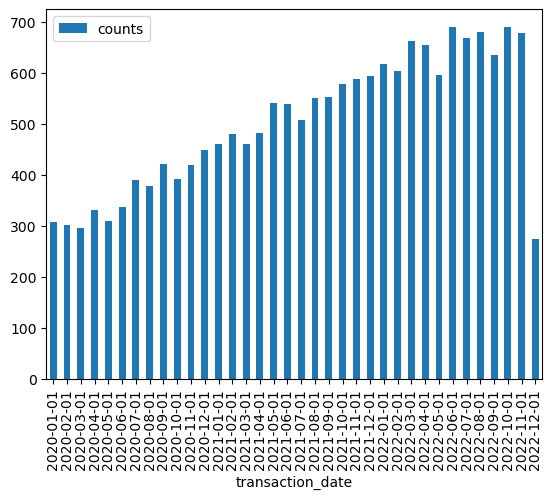

In [9]:
#When did they become subscribers?
tx_date_ct = df.groupby(['transaction_date']).size().reset_index(name='counts')
tx_date_ct.plot.bar(x = 'transaction_date', y='counts')

/tmp/ipykernel_20/2349593669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_init['tx_initial_month'] = pd.DatetimeIndex(cust_init['transaction_date']).month


<Axes: xlabel='tx_initial_month'>

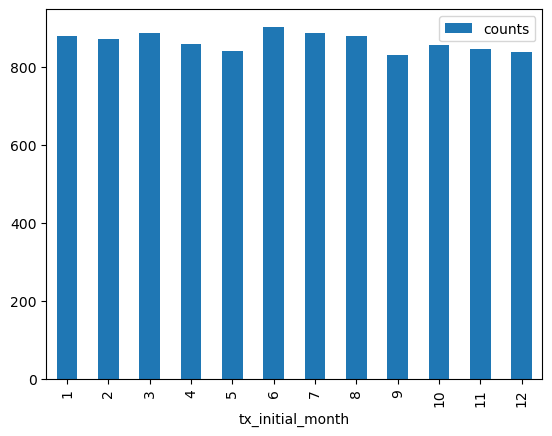

In [10]:
#Let's see if there is any month that overpowerd any other regarding intiial sub's
cust_init['tx_initial_month'] = pd.DatetimeIndex(cust_init['transaction_date']).month
tx_date_ct_month = cust_init.groupby(['tx_initial_month']).size().reset_index(name='counts')
tx_date_ct_month.plot.bar(x = 'tx_initial_month', y='counts')

Not much a difference month-to-month regardless of subsription year. Though June has the highest number of subscribers.

In [11]:
#What was most popular channel that caused subscriptions?